In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(1)

Using TensorFlow backend.


### 1. 데이터셋 준비

In [0]:
# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

print(X_val.shape, Y_val.shape, X_train.shape, Y_train.shape)

(10000, 28, 28) (10000,) (50000, 28, 28) (50000,)


In [5]:
X_train = X_train.reshape(50000, 28*28).astype('float32')/255.0
X_val = X_val.reshape(10000, 28*28).astype('float32')/255.0
X_test = X_test.reshape(10000, 28*28).astype('float32')/255.0

print(X_train.shape, X_val.shape, X_test.shape)

(50000, 784) (10000, 784) (10000, 784)


In [0]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [7]:
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(700, 784) (700,) (300, 784) (300,)


In [0]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [9]:
print(Y_train.shape, Y_val.shape, Y_test.shape)

(700, 10) (300, 10) (10000, 10)


### 2. 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

### 3. 모델 엮기

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기

In [0]:
import time
def nowtime(past):
  now = time.time()
  print('period[second]:{}'.format(now-past))
  return now

pasttime=0

In [0]:
pasttime=time.time()
hist = model.fit(X_train, Y_train, epochs=300, batch_size=10, validation_data=(X_val, Y_val))
print(nowtime(pasttime))

### 5. 모델 학습 과정 표시 

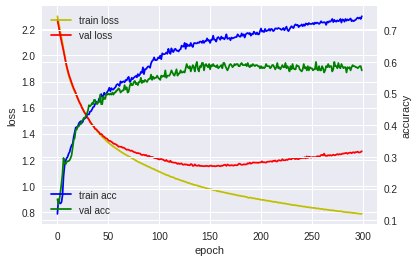

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 사용하기

In [24]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 18us/step

loss : 1.4396720204353333
accuracy : 0.5248


## 조기 종료 시키기

In [0]:
from keras.callbacks import EarlyStopping

In [0]:
early_stopping = EarlyStopping()
pasttime=time.time()
hist = model.fit(X_train, Y_train, nb_epoch = 1000, callbacks=[early_stopping], validation_data=(X_val, Y_val))
print(nowtime(pasttime))

### 6. 모델 사용하기

In [18]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 15us/step

loss : 1.3481858625411987
accuracy : 0.5259


### 5. 모델 학습 과정 표시

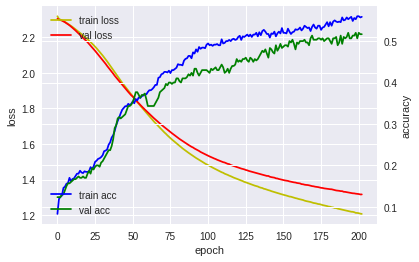

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [17]:
print(len(hist.history['loss']))

203
